In [1]:
import numpy as py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Users\Swet Navadiya\Desktop\INSAID\Fraud.csv")

In [4]:
data.shape

(6362620, 11)

In [5]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [7]:
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
data["isFraud"].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
data.isFlaggedFraud.value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [11]:
data["type"].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [12]:
FraudType_cashout = data[(data['isFraud'] == 1) & data['type'].isin(["CASH_OUT"])]
FraudType_cashIN = data[(data['isFraud'] == 1) & data['type'].isin(["CASH_IN"])]
FraudType_transfer = data[(data['isFraud'] == 1) & data['type'].isin(["TRANSFER"])]
FraudType_payment = data[(data['isFraud'] == 1) & data['type'].isin(["PAYMENT"])]
FraudType_debit = data[(data['isFraud'] == 1) & data['type'].isin(["DEBIT"])]
print(FraudType_cashout.count().type)
print(FraudType_cashIN.count().type)
print(FraudType_transfer.count().type)
print(FraudType_payment.count().type)
print(FraudType_debit.count().type)
print("As per this analysis only 'Cash_out' and 'Transfer' type transaction fraud detected")
ls_FraudType=["CASH_OUT","PAYMENT","CASH_IN","TRANSFER","DEBIT"]
ls_FraudTypeCount=[4116,0,0,4097,0]

4116
0
4097
0
0
As per this analysis only 'Cash_out' and 'Transfer' type transaction fraud detected


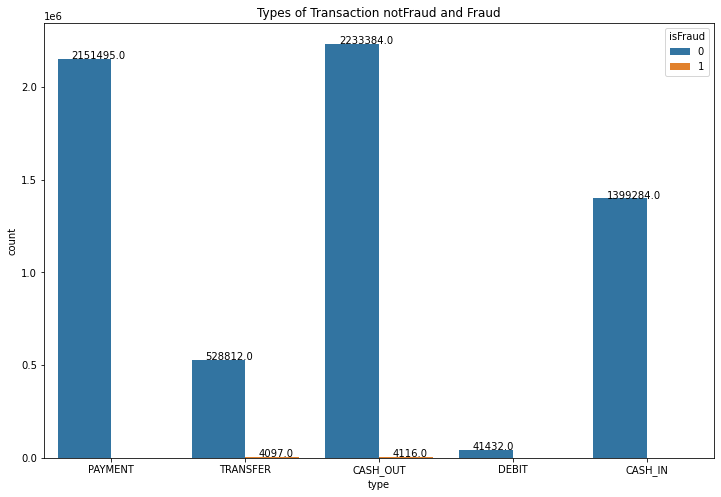

In [13]:
plt.figure(figsize=(12,8))
ax=sns.countplot(x = "type", hue="isFraud", data = data)
plt.title('Types of Transaction notFraud and Fraud')
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [14]:
result_type = data[(data['isFlaggedFraud'] == 1) & data['type'].isin(["CASH_OUT","CASH_IN","TRANSFER","DEBIT","PAYMENT"])]
print(result_type.count().type)
print("only Transfer type fraud detected.")

16
only Transfer type fraud detected.


In [21]:
data[(data['isFlaggedFraud']==1) & (data['isFraud'])]
#Every flagged fraud transaction is also fraud transaction , so we can remove isFlaggedFraud.


KeyError: 'isFlaggedFraud'

In [16]:
del data['isFlaggedFraud']

In [17]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1


In [18]:
#Count of not-fraud transaction
print("No.of not-fraud transaction is :",data.isFraud.value_counts()[0])
Pr_NF=((data.isFraud.value_counts()[0]/data.shape[0])*100)
print(Pr_NF)
#count of Fraud transaction
print("NO. of fraud Transaction is :",data.isFraud.value_counts()[1])
Pr_F=((data.isFraud.value_counts()[1]/data.shape[0])*100)
print(Pr_F)
print("As per above analysis there is highly imbalanced target data")

No.of not-fraud transaction is : 6354407
99.87091795518198
NO. of fraud Transaction is : 8213
0.12908204481801522
As per above analysis there is highly imbalanced target data


In [19]:
data1= data.loc[(data['type'].isin(['TRANSFER', 'CASH_OUT']))]
data1.head()



,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0


Text(0.5, 1.0, 'oldbalanceDest vs Fraud')

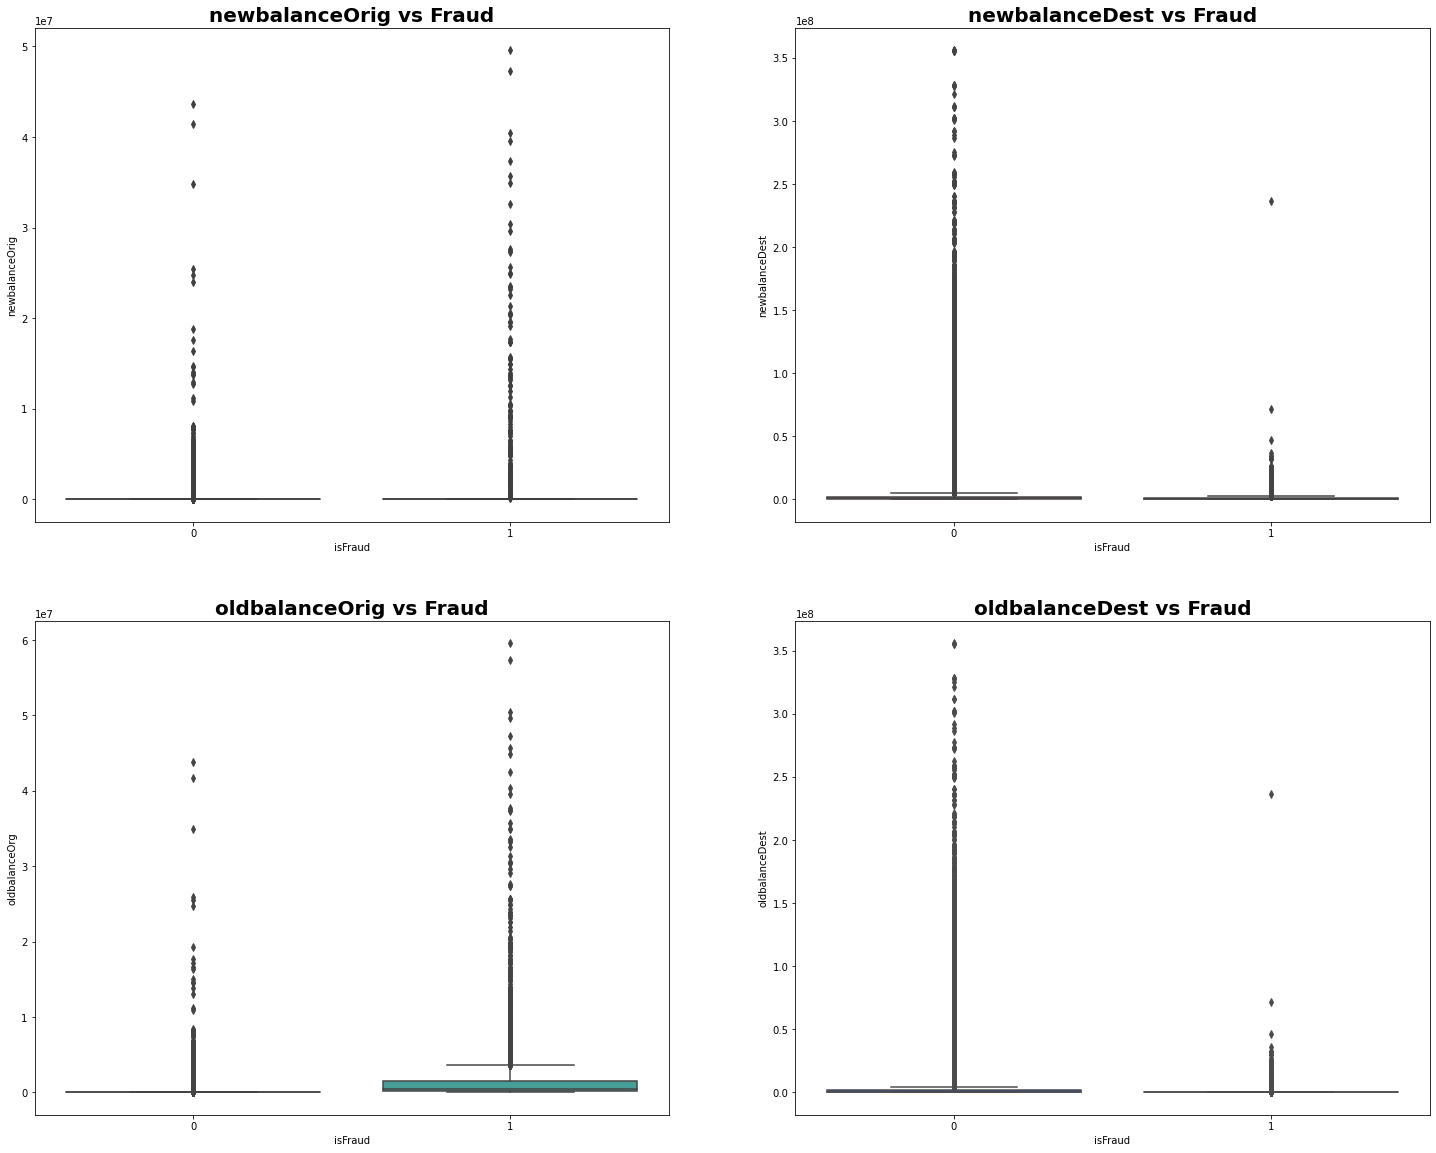

In [20]:
plt.figure(figsize=(25, 20))
plt.subplot(2,2,1)
sns.boxplot(x = 'isFraud', y = 'newbalanceOrig', data = data1)
plt.title('newbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,2)
sns.boxplot(x = 'isFraud', y = 'newbalanceDest', data = data1,palette="husl")
plt.title('newbalanceDest vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,3)
sns.boxplot(x = 'isFraud', y = 'oldbalanceOrg', data = data1, palette= 'husl')
plt.title('oldbalanceOrig vs Fraud',fontweight="bold", size=20)
plt.subplot(2,2,4)
sns.boxplot(x = 'isFraud', y = 'oldbalanceDest', data = data1,palette="bright")
plt.title('oldbalanceDest vs Fraud',fontweight="bold", size=20)



# 

In [22]:
data1.reset_index(inplace = True)

In [23]:
data1

,index,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
2,15,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0
3,19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
4,24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...,...,...,...
2770404,6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
2770405,6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
2770406,6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
2770407,6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1


In [24]:
del data1["index"]

In [25]:
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1


In [26]:
Cat_v=pd.get_dummies(data1.type)
print(Cat_v)

         CASH_OUT  TRANSFER
0               0         1
1               1         0
2               1         0
3               0         1
4               0         1
...           ...       ...
2770404         1         0
2770405         0         1
2770406         1         0
2770407         0         1
2770408         1         0

[2770409 rows x 2 columns]


In [27]:
data1=pd.concat([data1,Cat_v],axis="columns")
data1

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
0,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0,1
1,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,1,0
2,1,CASH_OUT,229133.94,C905080434,15325.00,0.0,C476402209,5083.00,51513.44,0,1,0
3,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0,1
4,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,1,0
2770405,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0,1
2770406,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,1,0
2770407,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0,1


In [28]:
data1["amount"].describe().apply("{0:.5f}".format)

count     2770409.00000
mean       317536.14087
std        887789.65764
min             0.00000
25%         82973.54000
50%        171260.93000
75%        306791.18000
max      92445516.64000
Name: amount, dtype: object

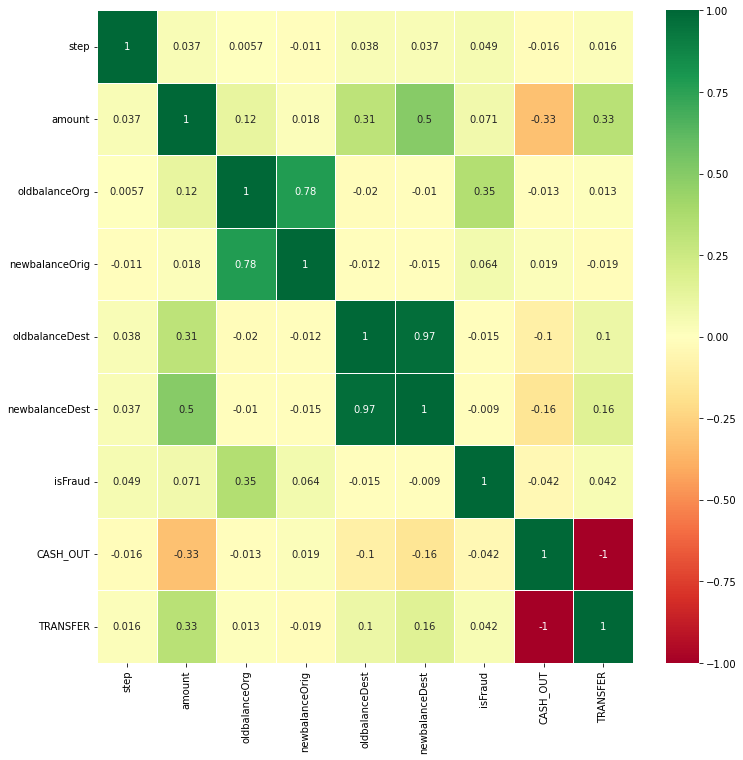

In [29]:
plt.figure(figsize=(12,12))
corr = sns.heatmap(data1.corr(),linewidths=.5, annot=True, cmap="RdYlGn")

In [30]:
del data1["nameOrig"]


In [31]:
del data1["nameDest"]

In [32]:
data1

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
0,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0,1
1,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,1,0
2,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,1,0
3,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,0,1
4,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,1
...,...,...,...,...,...,...,...,...,...,...
2770404,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,1,0
2770405,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0,1
2770406,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,1,0
2770407,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0,1


In [33]:
del data1["step"]

In [34]:
del data1['type']

In [35]:
data1

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_OUT,TRANSFER
0,181.00,181.00,0.0,0.00,0.00,1,0,1
1,181.00,181.00,0.0,21182.00,0.00,1,1,0
2,229133.94,15325.00,0.0,5083.00,51513.44,0,1,0
3,215310.30,705.00,0.0,22425.00,0.00,0,0,1
4,311685.89,10835.00,0.0,6267.00,2719172.89,0,0,1
...,...,...,...,...,...,...,...,...
2770404,339682.13,339682.13,0.0,0.00,339682.13,1,1,0
2770405,6311409.28,6311409.28,0.0,0.00,0.00,1,0,1
2770406,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,1,0
2770407,850002.52,850002.52,0.0,0.00,0.00,1,0,1


In [36]:
data1[(data1["newbalanceOrig"]==0) & (data1["oldbalanceOrg"])==0].count()

amount            1582335
oldbalanceOrg     1582335
newbalanceOrig    1582335
oldbalanceDest    1582335
newbalanceDest    1582335
isFraud           1582335
CASH_OUT          1582335
TRANSFER          1582335
dtype: int64

In [37]:
data1.isFraud.value_counts()

0    2762196
1       8213
Name: isFraud, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, classification_report, roc_curve,auc )
from imblearn.over_sampling import SMOTE

In [39]:
x=data1.drop(["isFraud"],axis=1)
y=data1["isFraud"]
print(x.shape)
print(y.shape)
y.value_counts()

(2770409, 7)
(2770409,)


0    2762196
1       8213
Name: isFraud, dtype: int64

In [40]:
#Here,Target data is imbalanced. 
# So we can use Synthetic Minority Over-sampling Technique(SMOTE) for resampling.
x_smote,y_smote = SMOTE().fit_resample(x,y)
y_smote.value_counts()
print(x_smote.shape)
print(y_smote.shape)


(5524392, 7)
(5524392,)


In [41]:
y_smote.value_counts()

1    2762196
0    2762196
Name: isFraud, dtype: int64

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote,stratify = y_smote,test_size=0.30, random_state=69)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3867074, 7)
(1657318, 7)
(3867074,)
(1657318,)


The accuracy of Logistic Regression is :  92.94734022076632 %
              precision    recall  f1-score   support

           0       0.97      0.89      0.93    828659
           1       0.90      0.97      0.93    828659

    accuracy                           0.93   1657318
   macro avg       0.93      0.93      0.93   1657318
weighted avg       0.93      0.93      0.93   1657318

Precision: 0.8968347951749193
Recall: 0.9705970731024463
F1: 0.9322591544463461
Area under precision (AUC) Recall: 0.8851666907019854


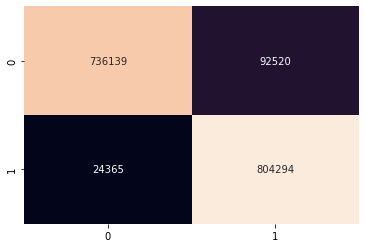

In [43]:
# Logistic Regression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
model = LR.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,fmt='d', annot=True)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

The accuracy of Decision Tree is :  99.90834589378743 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       1.00      1.00      1.00    828659

    accuracy                           1.00   1657318
   macro avg       1.00      1.00      1.00   1657318
weighted avg       1.00      1.00      1.00   1657318

Precision: 0.998785509085164
Recall: 0.9993821342675334
F1: 0.9990837326043407
Area under precision (AUC) Recall: 0.9984773266112492


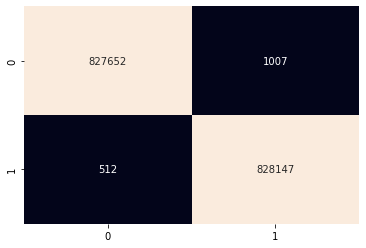

In [44]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
model = DT.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("The accuracy of Decision Tree is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),cbar=False,fmt='d', annot=True)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))

The accuracy of Random Forest is :  99.90146731043771 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828659
           1       1.00      1.00      1.00    828659

    accuracy                           1.00   1657318
   macro avg       1.00      1.00      1.00   1657318
weighted avg       1.00      1.00      1.00   1657318

Precision: 0.998451053283767
Recall: 0.9995800443849642
F1: 0.9990152298651294
Area under precision (AUC) Recall: 0.99824172596512


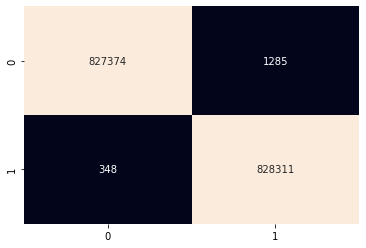

In [45]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=60)
model = RF.fit(x_train, y_train)
y_pred = model.predict(x_test)
print ("The accuracy of Random Forest is : ", accuracy_score(y_test, y_pred)*100, "%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d', cbar=False, annot=True)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))


the accuracy of KNN algoritham is :  99.47680529626783 %
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    828659
           1       0.99      1.00      0.99    828659

    accuracy                           0.99   1657318
   macro avg       0.99      0.99      0.99   1657318
weighted avg       0.99      0.99      0.99   1657318

Precision: 0.9905713205415987
Recall: 0.9990454457140995
F1: 0.99479033673855
Area under precision (AUC) Recall: 0.9901030435850358


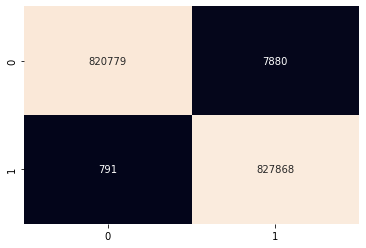

In [46]:
# KNN
from sklearn.neighbors import KNeighborsClassifier  
KNN= KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
KNN.fit(x_train, y_train) 
y_pred = KNN.predict(x_test)
print("the accuracy of KNN algoritham is : ",(accuracy_score(y_test,y_pred))*100,"%")
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',annot=True,cbar=False)
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("Area under precision (AUC) Recall:", average_precision_score(y_test, y_pred))